In [1]:
# Source : https://machinelearningmastery.com/how-to-reduce-overfitting-with-dropout-regularization-in-keras/

In [2]:
from matplotlib import pyplot
from pandas import DataFrame

from sklearn.datasets import make_circles

from keras import Sequential
from keras.layers import Dense
from keras.layers import Dropout

/tmp/ipykernel_9049/965476510.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  from pandas import DataFrame
2024-02-28 10:29:18.855017: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-28 10:29:18.856732: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-28 10:29:18.885997: E external/local_xla/xla/stream_executor/cuda/cu

In [3]:
# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

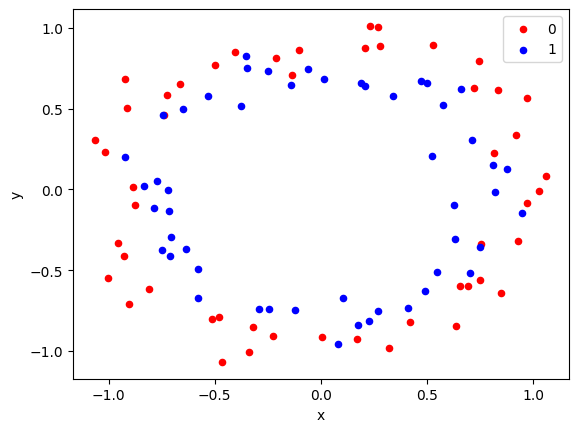

In [4]:
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [5]:
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [6]:
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=1)

Epoch 1/200
1/1 [==============================] - 0s 438ms/step - loss: 0.6914 - accuracy: 0.6000 - val_loss: 0.6964 - val_accuracy: 0.4714
Epoch 2/200
1/1 [==============================] - 0s 23ms/step - loss: 0.6883 - accuracy: 0.5667 - val_loss: 0.6981 - val_accuracy: 0.5000
Epoch 3/200
1/1 [==============================] - 0s 20ms/step - loss: 0.6854 - accuracy: 0.5667 - val_loss: 0.6998 - val_accuracy: 0.4857
Epoch 4/200
1/1 [==============================] - 0s 20ms/step - loss: 0.6827 - accuracy: 0.5667 - val_loss: 0.7015 - val_accuracy: 0.4857
Epoch 5/200
1/1 [==============================] - 0s 22ms/step - loss: 0.6802 - accuracy: 0.6000 - val_loss: 0.7034 - val_accuracy: 0.4857
Epoch 6/200
1/1 [==============================] - 0s 26ms/step - loss: 0.6777 - accuracy: 0.6000 - val_loss: 0.7052 - val_accuracy: 0.4857
Epoch 7/200
1/1 [==============================] - 0s 24ms/step - loss: 0.6753 - accuracy: 0.6000 - val_loss: 0.7071 - val_accuracy: 0.4714
Epoch 8/200
1/1 [==

In [8]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.833, Test: 0.614


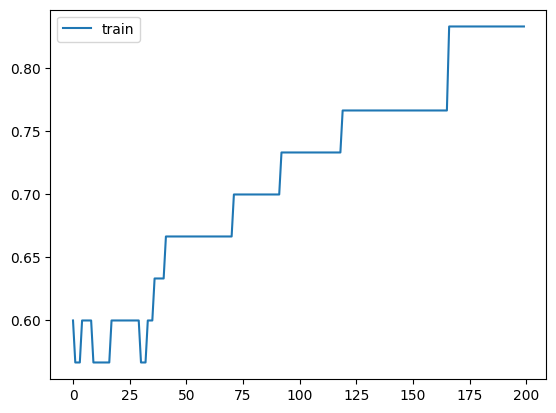

In [9]:
# plot history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.legend()
pyplot.show()

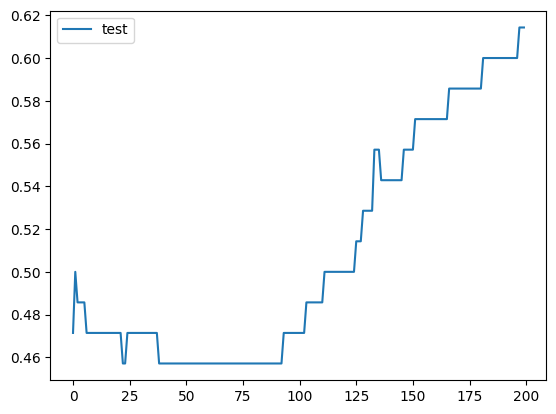

In [10]:
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

## ANN with Dropout

In [11]:
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)

In [13]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.967, Test: 0.800


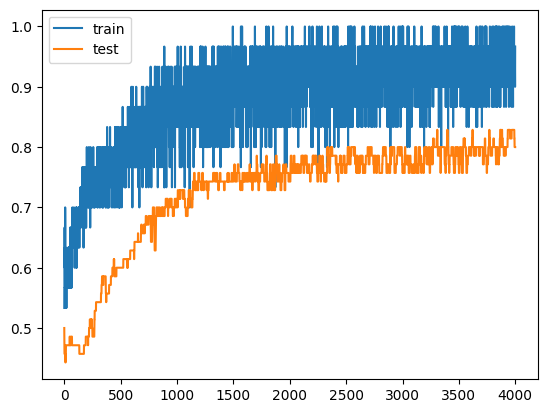

In [14]:
# plot history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()